3. Who is performing co-visits? Are they generally performed by the same provider or discipline or by multiple providers or disciplines? Is it more likely for a co-visit to occur if vendor services are within the same agency?

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
import seaborn as sns

In [2]:
# Importing csv files from TEIS

df = pd.read_csv('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx - Compiled_IFSP Teaming.csv')

In [3]:
# View columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CHILD_ID              9543 non-null   int64 
 1   SERVICE_DATE          9543 non-null   object
 2   START_TIME            9532 non-null   object
 3   END_TIME              9532 non-null   object
 4   SERVICE_SETTING       9533 non-null   object
 5   SERVICE DELIVERY      9543 non-null   object
 6   ADD_USER              9543 non-null   object
 7   ADD_DATE              9543 non-null   object
 8   IFSP Teaming ID name  9543 non-null   object
 9   Agency Name           9543 non-null   object
 10  Agency Type           9543 non-null   object
 11  Service Name          9543 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.8+ KB


In [4]:
# Determine if providers have more visitis or co-visits

providers = df.groupby(['Agency Name', 'IFSP Teaming ID name']).size()
providers

Agency Name                                   IFSP Teaming ID name
BEST (Blind-Visually Impaired Early Svcs Tn)  Co-Visit                 44
                                              IEP Meeting               4
                                              IFSP Meeting             28
BRIDGES - Tennessee Tech University           Co-Visit                 12
                                              IEP Meeting               6
                                                                     ... 
WAVES, Inc.                                   Co-Visit                169
                                              IEP Meeting              40
                                              IFSP Meeting            220
WeeCommunicate, LLC                           Co-Visit                  1
Words for Life Speech & Language Center, LLC  Co-Visit                  1
Length: 156, dtype: int64

In [5]:
# Creating an identifying number for visits

covisits = df[df['IFSP Teaming ID name'] == 'Co-Visit']

covisits.head()

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
1,457136,2/15/2022,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2/16/22 5:29,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
6,458850,2/15/2022,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:07,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
7,458851,2/15/2022,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:08,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
8,459167,1/26/2022,9:30:00,10:00:00,Telehealth,Service Delivered,HINESKONSTANCE,1/26/22 11:08,Co-Visit,LeBonheur EI & Dev (LEAD) (EIRA),EIRA,Physical Therapy Assistant
9,459167,1/26/2022,9:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2/2/22 11:57,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy


In [6]:
# Sorting the visits by CHILD_ID and SERVICE_DATE

covisits = covisits.sort_values(['CHILD_ID', 'SERVICE_DATE'])

covisits.head()

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
1,457136,2/15/2022,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2/16/22 5:29,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
6,458850,2/15/2022,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:07,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
7,458851,2/15/2022,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:08,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
8,459167,1/26/2022,9:30:00,10:00:00,Telehealth,Service Delivered,HINESKONSTANCE,1/26/22 11:08,Co-Visit,LeBonheur EI & Dev (LEAD) (EIRA),EIRA,Physical Therapy Assistant
9,459167,1/26/2022,9:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2/2/22 11:57,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy


In [7]:
# Creating identying number for covisits


covisits = covisits.reset_index(drop=True)

visit_id = 1
visit_ids = []

for index, row in covisits.iterrows():
    if index == 0:
        visit_ids.append(visit_id)
    elif row['CHILD_ID'] == covisits.iloc[index - 1]['CHILD_ID'] and row['SERVICE_DATE'] == covisits.iloc[index - 1]['SERVICE_DATE']:
        visit_ids.append(visit_id)
    else:
        visit_id += 1
        visit_ids.append(visit_id)

covisits['VISIT_ID'] = visit_ids

In [8]:
# View dataframe

covisits

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,VISIT_ID
0,457136,2/15/2022,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2/16/22 5:29,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,1
1,458850,2/15/2022,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:07,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,2
2,458851,2/15/2022,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:08,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,3
3,459167,1/26/2022,9:30:00,10:00:00,Telehealth,Service Delivered,HINESKONSTANCE,1/26/22 11:08,Co-Visit,LeBonheur EI & Dev (LEAD) (EIRA),EIRA,Physical Therapy Assistant,4
4,459167,1/26/2022,9:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2/2/22 11:57,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4086,540954,1/27/2023,10:35:00,11:33:00,Other,Service Delivered,SPRADLINGSARAH,1/27/23 15:21,Co-Visit,Rainbow Early Intervention (HATS),EIRA,Dev. Therapy Prof - Home/Community,3552
4087,541337,1/10/2023,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,1/12/23 17:55,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,3553
4088,541511,1/19/2023,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,1/20/23 16:11,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,3554
4089,541890,1/19/2023,9:00:00,10:00:00,Home,Service Delivered,WESTAMY,1/20/23 10:23,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,3555


In [9]:
# Create a count of how many types of visits each CHILD ID has

ccount = df.groupby(['CHILD_ID', 'IFSP Teaming ID name']).size()

ccount



CHILD_ID  IFSP Teaming ID name
457136    Co-Visit                1
          IEP Meeting             1
457585    IEP Meeting             1
457852    IEP Meeting             1
458051    IFSP Meeting            1
                                 ..
541337    Co-Visit                1
541511    Co-Visit                1
541890    Co-Visit                1
542077    IFSP Meeting            1
542122    Co-Visit                1
Length: 5843, dtype: int64

In [10]:
# Create a count of how many types of visits and agencies each CHILD ID has

cpcount = df.groupby(['CHILD_ID', 'IFSP Teaming ID name', 'Agency Name']).size()

cpcount.head(20)

CHILD_ID  IFSP Teaming ID name  Agency Name                                      
457136    Co-Visit              Siskin Children's Institute (EIRA)                   1
          IEP Meeting           Siskin Children's Institute (EIRA)                   1
457585    IEP Meeting           Siskin Children's Institute (EIRA)                   1
457852    IEP Meeting           LTVEC                                                1
458051    IFSP Meeting          First Steps, Inc (EIRA)                              1
458230    IFSP Meeting          Sunshine Early Intervention - Knox Cty ARC           1
458850    Co-Visit              Physical Therapy Services, PA (EIRA)                 1
458851    Co-Visit              Physical Therapy Services, PA (EIRA)                 1
459167    Co-Visit              LeBonheur EI & Dev (LEAD) (EIRA)                     1
                                LeBonheur EI & Dev (LEAD) (vendor)                   4
                                Shelby Residenti

In [11]:
# Create a count of how many types of visits and agencies and services each CHILD ID has

cpscount = df.groupby(['CHILD_ID', 'IFSP Teaming ID name', 'Agency Name', 'Service Name']).size()

cpscount.head(20)

CHILD_ID  IFSP Teaming ID name  Agency Name                                        Service Name                      
457136    Co-Visit              Siskin Children's Institute (EIRA)                 Dev. Therapy Prof - Home/Community    1
          IEP Meeting           Siskin Children's Institute (EIRA)                 Dev. Therapy Prof - Home/Community    1
457585    IEP Meeting           Siskin Children's Institute (EIRA)                 Dev. Therapy Prof - Home/Community    1
457852    IEP Meeting           LTVEC                                              Dev. Therapy Prof - Home/Community    1
458051    IFSP Meeting          First Steps, Inc (EIRA)                            Dev. Therapy Prof - Home/Community    1
458230    IFSP Meeting          Sunshine Early Intervention - Knox Cty ARC         Dev. Therapy Prof - Home/Community    1
458850    Co-Visit              Physical Therapy Services, PA (EIRA)               Dev. Therapy Prof - Home/Community    1
458851    Co-Visit   

In [12]:
# Create a count of ISFP Meeting Types

ifsp = df.groupby('IFSP Teaming ID name').size()
ifsp

IFSP Teaming ID name
Co-Visit        4091
IEP Meeting      632
IFSP Meeting    4820
dtype: int64

In [13]:
# Create a running total to plot number of total visits for child by day to see how many are multiples

df2 = df.reset_index(drop=True)

df2 = df2.sort_values(['CHILD_ID', 'SERVICE_DATE'])

visit_id = 1
visit_ids = []

for index, row in df2.iterrows():
    if index == 0:
        visit_ids.append(visit_id)
    elif row['CHILD_ID'] == df2.iloc[index - 1]['CHILD_ID'] and row['SERVICE_DATE'] == df2.iloc[index - 1]['SERVICE_DATE']:
        visit_ids.append(visit_id)
    else:
        visit_id += 1
        visit_ids.append(visit_id)

df2['VISIT_ID'] = visit_ids

In [14]:
# View dataframe

df2

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,VISIT_ID
0,457136,1/21/2022,9:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,1/21/22 17:54,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,1
1,457136,2/15/2022,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2/16/22 5:29,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,2
2,457585,1/24/2022,8:30:00,9:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,1/24/22 14:18,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,3
3,457852,1/12/2022,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,1/18/22 10:39,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community,4
4,458051,1/12/2022,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,1/12/22 13:46,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,541337,1/10/2023,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,1/12/23 17:55,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8493
9539,541511,1/19/2023,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,1/20/23 16:11,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8494
9540,541890,1/19/2023,9:00:00,10:00:00,Home,Service Delivered,WESTAMY,1/20/23 10:23,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8495
9541,542077,1/30/2023,14:30:00,15:20:00,Telehealth,Service Delivered,FANELLASAMANTHA,1/30/23 15:21,IFSP Meeting,Pediatric Language Clinic,EIRA,Dev. Therapy Prof - Home/Community,8496


In [15]:
# Create a count of how many covists for agencies each CHILD ID has

cpcvcount = covisits.groupby(['CHILD_ID', 'Agency Name']).size()

cpcvcount.head(20)

CHILD_ID  Agency Name                                      
457136    Siskin Children's Institute (EIRA)                   1
458850    Physical Therapy Services, PA (EIRA)                 1
458851    Physical Therapy Services, PA (EIRA)                 1
459167    LeBonheur EI & Dev (LEAD) (EIRA)                     1
          LeBonheur EI & Dev (LEAD) (vendor)                   4
          Shelby Residential & Voc Svcs(SRVS) (EIRA)           1
459566    Signal Centers, Inc.                                 1
460456    Susan Gray School - Vanderbilt Univ                  1
460584    LeBonheur EI & Dev (LEAD) (vendor)                   1
          Support Solutions of the Mid-South (CS Patterson)    1
460965    LeBonheur EI & Dev (LEAD) (vendor)                   5
461124    Kid's Putnam, Inc.                                   2
462527    BRIDGES - Tennessee Tech University                  1
462846    Vanderbilt Bill Wilkerson Center                     1
462915    BEST (Blind-Visually

In [16]:
# Create a count of how many covists for agencies and services each CHILD ID has

cpscvcount = covisits.groupby(['CHILD_ID', 'Agency Name', 'Service Name']).size()

cpscvcount.head(30)

CHILD_ID  Agency Name                                        Service Name                      
457136    Siskin Children's Institute (EIRA)                 Dev. Therapy Prof - Home/Community    1
458850    Physical Therapy Services, PA (EIRA)               Dev. Therapy Prof - Home/Community    1
458851    Physical Therapy Services, PA (EIRA)               Dev. Therapy Prof - Home/Community    1
459167    LeBonheur EI & Dev (LEAD) (EIRA)                   Physical Therapy Assistant            1
          LeBonheur EI & Dev (LEAD) (vendor)                 Occupational Therapy                  2
                                                             Speech Therapy                        2
          Shelby Residential & Voc Svcs(SRVS) (EIRA)         Dev. Therapy Prof - Home/Community    1
459566    Signal Centers, Inc.                               Dev. Therapy Prof - Home/Community    1
460456    Susan Gray School - Vanderbilt Univ                Dev. Therapy Prof - Home/Community 

In [17]:
#Create a dataframe with the Child ID, Agency completing service, Service Provided, and the count of visits.

cas_count = pd.DataFrame(cpscvcount)

cas_count = cas_count.reset_index().rename(columns={'CHILD_ID': 'Child ID', 0: 'Count', 'Agency Name': 'Agency', 'Service Name': 'Service'})

cas_count

,Child ID,Agency,Service,Count
0,457136,Siskin Children's Institute (EIRA),Dev. Therapy Prof - Home/Community,1
1,458850,"Physical Therapy Services, PA (EIRA)",Dev. Therapy Prof - Home/Community,1
2,458851,"Physical Therapy Services, PA (EIRA)",Dev. Therapy Prof - Home/Community,1
3,459167,LeBonheur EI & Dev (LEAD) (EIRA),Physical Therapy Assistant,1
4,459167,LeBonheur EI & Dev (LEAD) (vendor),Occupational Therapy,2
...,...,...,...,...
2027,540954,Rainbow Early Intervention (HATS),Dev. Therapy Prof - Home/Community,1
2028,541337,"Kid's Putnam, Inc.",Dev. Therapy Prof - Home/Community,1
2029,541511,"Kid's Putnam, Inc.",Dev. Therapy Prof - Home/Community,1
2030,541890,"Kid's Putnam, Inc.",Dev. Therapy Prof - Home/Community,1


In [18]:
# group by CHILD_ID and SERVICE_DATE columns
grouped = covisits.groupby(['CHILD_ID', 'SERVICE_DATE'])

# filter out groups that have only one entry
filtered = grouped.filter(lambda x: len(x) > 1)

filtered.head(20)

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,VISIT_ID
3,459167,1/26/2022,9:30:00,10:00:00,Telehealth,Service Delivered,HINESKONSTANCE,1/26/22 11:08,Co-Visit,LeBonheur EI & Dev (LEAD) (EIRA),EIRA,Physical Therapy Assistant,4
4,459167,1/26/2022,9:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2/2/22 11:57,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy,4
5,459167,1/26/2022,9:00:00,9:30:00,Home,Service Delivered,CARDENHILLARY,3/8/22 22:20,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Occupational Therapy,4
6,459167,2/9/2022,9:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2/9/22 11:40,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy,5
7,459167,2/9/2022,9:00:00,10:00:00,Telehealth,Service Delivered,REESEPATRICIA,2/13/22 19:10,Co-Visit,Shelby Residential & Voc Svcs(SRVS) (EIRA),EIRA,Dev. Therapy Prof - Home/Community,5
8,459167,2/9/2022,9:00:00,10:00:00,Home,Service Delivered,CARDENHILLARY,3/8/22 22:29,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Occupational Therapy,5
11,460584,1/6/2022,13:00:00,13:39:00,Telehealth,Service Delivered,CARTERHILLARY,1/6/22 14:40,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Occupational Therapy,8
12,460584,1/6/2022,13:00:00,13:39:00,Telehealth,Service Delivered,SCOTTKRISTINA,1/6/22 15:25,Co-Visit,Support Solutions of the Mid-South (CS Patterson),EIRA,Dev. Therapy Prof - Home/Community,8
14,460965,2/10/2022,9:00:00,10:00:00,Community-based,Service Delivered,PULLIAMAMY,2/10/22 18:12,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Dev. Therapy - BCBA,10
15,460965,2/10/2022,8:45:00,9:45:00,Community-based,Service Delivered,CREWSJILL,2/18/22 14:52,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy,10


In [19]:
# Create a count of Agencies that appear when a child has multiple visits one one day

grp_prov = filtered.groupby(['CHILD_ID', 'SERVICE_DATE', 'Agency Name', ]).size()

grp_prov_df = pd.DataFrame(grp_prov)

grp_prov_df = grp_prov_df.reset_index().rename(columns={'CHILD_ID': 'Child ID', 0: 'Count', 'SERVICE_DATE': 'Service Date', 'Agency Name': 'Agency'})

grp_prov_df

,Child ID,Service Date,Agency,Count
0,459167,1/26/2022,LeBonheur EI & Dev (LEAD) (EIRA),1
1,459167,1/26/2022,LeBonheur EI & Dev (LEAD) (vendor),2
2,459167,2/9/2022,LeBonheur EI & Dev (LEAD) (vendor),2
3,459167,2/9/2022,Shelby Residential & Voc Svcs(SRVS) (EIRA),1
4,460584,1/6/2022,LeBonheur EI & Dev (LEAD) (vendor),1
...,...,...,...,...
798,537193,12/20/2022,Heightened Potential Co,1
799,537193,12/20/2022,LTVEC,1
800,539735,1/31/2023,LeBonheur EI & Dev (LEAD) (vendor),2
801,539948,1/31/2023,LeBonheur EI & Dev (LEAD) (EIRA),1


In [20]:
df2.head()

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,VISIT_ID
0,457136,1/21/2022,9:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,1/21/22 17:54,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,1
1,457136,2/15/2022,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2/16/22 5:29,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,2
2,457585,1/24/2022,8:30:00,9:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,1/24/22 14:18,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,3
3,457852,1/12/2022,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,1/18/22 10:39,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community,4
4,458051,1/12/2022,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,1/12/22 13:46,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,5


In [21]:
# Create a count of all single visits on a SERVICE_DATE

counts = df2['VISIT_ID'].value_counts()
df2_2 = df2[df2['VISIT_ID'].isin(counts[counts == 1].index)]

In [22]:
df2_2

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,VISIT_ID
0,457136,1/21/2022,9:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,1/21/22 17:54,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,1
1,457136,2/15/2022,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2/16/22 5:29,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,2
2,457585,1/24/2022,8:30:00,9:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,1/24/22 14:18,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,3
3,457852,1/12/2022,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,1/18/22 10:39,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community,4
4,458051,1/12/2022,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,1/12/22 13:46,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,541337,1/10/2023,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,1/12/23 17:55,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8493
9539,541511,1/19/2023,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,1/20/23 16:11,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8494
9540,541890,1/19/2023,9:00:00,10:00:00,Home,Service Delivered,WESTAMY,1/20/23 10:23,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8495
9541,542077,1/30/2023,14:30:00,15:20:00,Telehealth,Service Delivered,FANELLASAMANTHA,1/30/23 15:21,IFSP Meeting,Pediatric Language Clinic,EIRA,Dev. Therapy Prof - Home/Community,8496


In [23]:
# Creating a count of all IFSP Teaming ID name counts

cvdf2_2 = df2_2['IFSP Teaming ID name'].value_counts()
cvdf2_2

IFSP Meeting    3937
Co-Visit        3124
IEP Meeting      509
Name: IFSP Teaming ID name, dtype: int64

In [24]:
# Filter the single visits dataframe for just Co-Visits

cdf2_2 = df2_2.loc[df2_2['IFSP Teaming ID name'] == 'Co-Visit']
cdf2_2

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,VISIT_ID
1,457136,2/15/2022,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2/16/22 5:29,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,2
6,458850,2/15/2022,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:07,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,7
7,458851,2/15/2022,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:08,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,8
12,459167,1/26/2022,9:00:00,9:30:00,Home,Service Delivered,CARDENHILLARY,3/8/22 22:20,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Occupational Therapy,10
10,459167,2/9/2022,9:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2/9/22 11:40,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,540954,1/27/2023,10:35:00,11:33:00,Other,Service Delivered,SPRADLINGSARAH,1/27/23 15:21,Co-Visit,Rainbow Early Intervention (HATS),EIRA,Dev. Therapy Prof - Home/Community,8492
9538,541337,1/10/2023,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,1/12/23 17:55,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8493
9539,541511,1/19/2023,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,1/20/23 16:11,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8494
9540,541890,1/19/2023,9:00:00,10:00:00,Home,Service Delivered,WESTAMY,1/20/23 10:23,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,8495


In [25]:
# Group all single visit Co-Visits by Agency Name and Service Name

ag_serv_df2 = cdf2_2.groupby(['Agency Name', 'Service Name']).size()
ag_serv_df2

Agency Name                                   Service Name                      
BEST (Blind-Visually Impaired Early Svcs Tn)  Dev. Therapy Prof - Home/Community    27
                                              Evaluation/Assessment - Vision         1
                                              Vision Services                        9
BRIDGES - Tennessee Tech University           Dev. Therapy Prof - Home/Community    11
Beth A. Ballinger                             Occupational Therapy                   2
                                                                                    ..
Vanderbilt Bill Wilkerson Center              Speech Therapy                         1
                                              Speech Therapy-Group                   1
Vanderbilt Pediatric Rehabilitation           Occupational Therapy                   3
WAVES, Inc.                                   Dev. Therapy Prof - Home/Community    97
                                              Vis

In [33]:
# Calculate the percent of Co-Visits to all visits

cvper = (df2['IFSP Teaming ID name'].value_counts(normalize=True) * 100)['Co-Visit']
cvper

42.86911872576758

In [37]:
cvper.plot.pie(autopct='%.1f%%', labels = ['ISFP Meeting', 'Co-Visits', 'IEP Meeting'])
plt.show()

AttributeError: 'numpy.float64' object has no attribute 'plot'

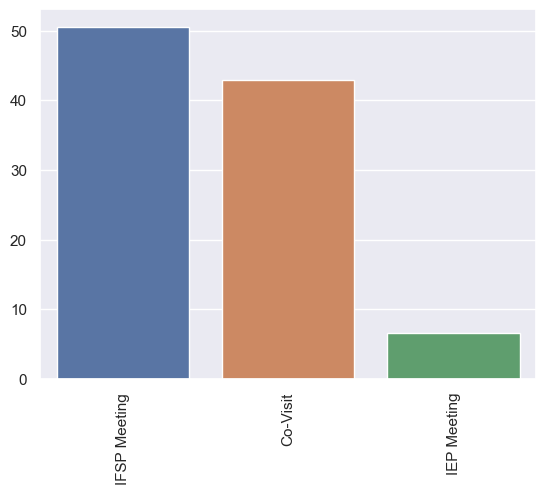

In [35]:
# Plot percentage of IFSP Teaming ID name types

data = df2['IFSP Teaming ID name'].value_counts(normalize=True) * 100
sns.set()
ax = sns.barplot(x=data.index, y=data.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

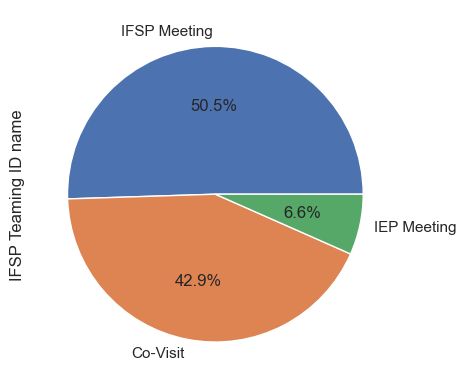

In [39]:
# same graph but as a pie chart

data.plot.pie(autopct='%.1f%%')
plt.show()

In [40]:
# Calculate the percentage of Co-Visits that are single visits without co's

single_cov = (len(cdf2_2) / len(covisits)) * 100
single_cov

76.36274749450013

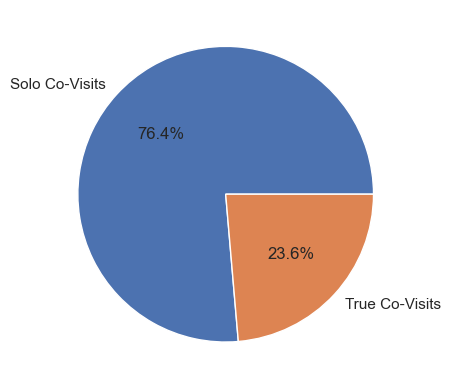

In [41]:
# Create a piechart for single Co-Visits

data2 = pd.Series([single_cov, 100 - single_cov], index=['cdf2_2', 'covisits'])
data2.plot.pie(autopct='%.1f%%', labels = ['Solo Co-Visits', 'True Co-Visits'])
plt.show()

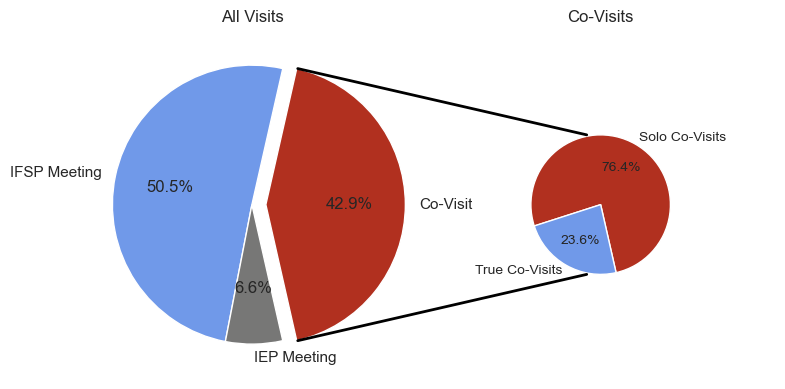

In [85]:
# colors for chart
colors = ["#B1301F", "#7099E9", "#777776"]
sns.set_theme() #this will put your chart on default settings so we all start on the same page
sns.set_palette(colors) #this will plug in the color palette.

# make figure and assign axis objects
fig = plt.figure(figsize=(9, 5.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# large pie chart parameters
ratios = [.429, .505, .066]
labels = ['Co-Visit', 'IFSP Meeting', 'IEP Meeting']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# small pie chart parameters
ratios = [.764, .236]
labels = ['Solo Co-Visits', 'True Co-Visits']
width = .2

ax2.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, radius=0.5, textprops={'size': 'smaller'})

ax1.set_title('All Visits')
ax2.set_title('Co-Visits')

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r

# draw top connecting line
x = r * np.cos(np.pi / 181 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, .5), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 181 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, -.5), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax2, axesB=ax1)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.show()

In [93]:
pattern_mapping = {
    'Dev': 'Developmental Therapy',
    'Phys': 'Physical Therapy',
    'Occu': 'Occupational Therapy',
    'Vision': 'Vision Services',
    'Speech': 'Speech Therapy'
    
}


def clean_service_name(service_name):
    cleaned_name = service_name  
    
    
    for pattern, cleaned_value in pattern_mapping.items():
        if pattern in service_name:
            cleaned_name = cleaned_value
            break
    
    return cleaned_name


covisits['cleaned_service_name'] = covisits['Service Name'].apply(clean_service_name)
covisits

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,VISIT_ID,cleaned_service_name
0,457136,2/15/2022,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2/16/22 5:29,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,1,Developmental Therapy
1,458850,2/15/2022,14:00:00,14:30:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:07,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,2,Developmental Therapy
2,458851,2/15/2022,14:15:00,14:45:00,Telehealth,Service Delivered,BUCKCYNTHIA,2/15/22 18:08,Co-Visit,"Physical Therapy Services, PA (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,3,Developmental Therapy
3,459167,1/26/2022,9:30:00,10:00:00,Telehealth,Service Delivered,HINESKONSTANCE,1/26/22 11:08,Co-Visit,LeBonheur EI & Dev (LEAD) (EIRA),EIRA,Physical Therapy Assistant,4,Physical Therapy
4,459167,1/26/2022,9:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2/2/22 11:57,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy,4,Speech Therapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4086,540954,1/27/2023,10:35:00,11:33:00,Other,Service Delivered,SPRADLINGSARAH,1/27/23 15:21,Co-Visit,Rainbow Early Intervention (HATS),EIRA,Dev. Therapy Prof - Home/Community,3552,Developmental Therapy
4087,541337,1/10/2023,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,1/12/23 17:55,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,3553,Developmental Therapy
4088,541511,1/19/2023,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,1/20/23 16:11,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,3554,Developmental Therapy
4089,541890,1/19/2023,9:00:00,10:00:00,Home,Service Delivered,WESTAMY,1/20/23 10:23,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,3555,Developmental Therapy


In [101]:
# group the data by VISIT_ID
grouped = covisits.groupby('VISIT_ID')

# create an empty dictionary to store the counts of agency pairs
agency_pairs = {}

# iterate over each group
for visit_id, group in grouped:
    # get the unique agency names for this visit_id
    agencies = group['Agency Name'].unique()
    # iterate over all pairs of agencies
    for i in range(len(agencies)):
        for j in range(i+1, len(agencies)):
            # create a tuple for the pair of agencies
            pair = tuple(sorted((agencies[i], agencies[j])))
            # increment the count for this pair in the dictionary
            agency_pairs[pair] = agency_pairs.get(pair, 0) + 1

# convert the dictionary to a dataframe
result = pd.DataFrame(list(agency_pairs.items()), columns=['agency_pair', 'count'])

# sort the result in descending order by the count column
result = result.sort_values(by='count', ascending=False)

# display the result
result



,agency_pair,count
0,"(LeBonheur EI & Dev (LEAD) (EIRA), LeBonheur E...",154
3,"(Therapy & Learning Center Inc (vendor WTCCD),...",18
21,"(KF Pediatric Therapy, Signal Centers, Inc.)",9
4,"(KF Pediatric Therapy, Siskin Children's Insti...",9
11,"(LeBonheur EI & Dev (LEAD) (EIRA), Shelby Resi...",8
37,"(Middle Tennessee State University, WAVES, Inc.)",7
29,"(LeBonheur EI & Dev (LEAD) (vendor), Therapy &...",7
6,"(Holly Hanna dba Pediatric Physical Therapy, S...",6
9,"(Emory Valley Center, Heightened Potential Co)",5
1,"(LeBonheur EI & Dev (LEAD) (vendor), Shelby Re...",5


In [102]:

total_count = result['count'].sum()

total_count

297

In [96]:
visit_grouped = covisits.groupby('VISIT_ID')['cleaned_service_name'].apply(list).reset_index()


visit_grouped['service_pairs'] = visit_grouped['cleaned_service_name'].apply(lambda x: list(combinations(x, 2)))


service_pairs = [pair for pairs in visit_grouped['service_pairs'] for pair in pairs]
service_pairs_sorted = [tuple(sorted(pair)) for pair in service_pairs]

pair_counts = pd.Series(service_pairs_sorted).value_counts().reset_index()
pair_counts.columns = ['service_pair', 'count']


pair_counts = pair_counts.sort_values('count', ascending=False)
pair_counts

NameError: name 'combinations' is not defined

In [89]:
pair_counts[['Service1', 'Service2']] = pd.DataFrame(pair_counts['service_pair'].tolist())

NameError: name 'pair_counts' is not defined

In [90]:
heatmap_data = pair_counts.pivot('Service1', 'Service2', 'count')

NameError: name 'pair_counts' is not defined